<a href="https://colab.research.google.com/github/NithinR241328/water_pollution-research-paper-/blob/main/Water_pollution_code_(stacked_ensemble_with_many_algorithms)_(1)_Copy1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score,cross_validate,KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,StackingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,roc_auc_score,roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import normalize,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

## Dataset

In [ ]:
data=pd.read_csv('waterQuality1.csv')
data.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [ ]:
data['is_safe'].value_counts()

is_safe
0        7084
1         912
#NUM!       3
Name: count, dtype: int64

In [ ]:
data.shape

(7999, 21)

In [ ]:
data['is_safe'].unique()

array(['1', '0', '#NUM!'], dtype=object)

In [ ]:
data['is_safe'].value_counts()

is_safe
0        7084
1         912
#NUM!       3
Name: count, dtype: int64

In [ ]:
data['is_safe'] = data['is_safe'].replace('#NUM!', pd.NA)

# Drop rows containing NaN values in the 'is_safe' column
data = data.dropna(subset=['is_safe'])

# Reset index after dropping rows
data = data.reset_index(drop=True)

In [ ]:
data['ammonia'] = pd.to_numeric(data['ammonia'], errors='coerce', downcast='float')

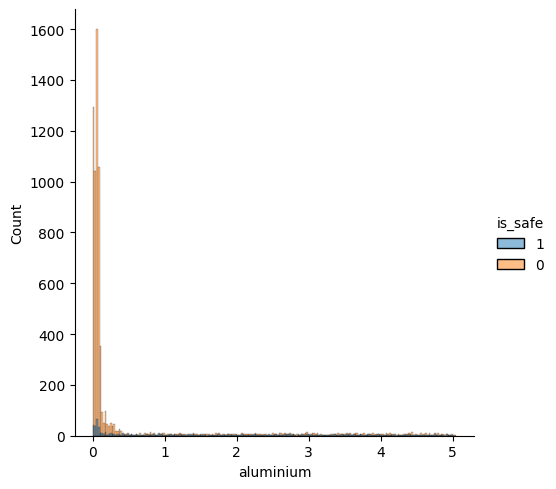

In [ ]:
sns.displot(data=data,x='aluminium',hue='is_safe',kind='hist')
plt.show()

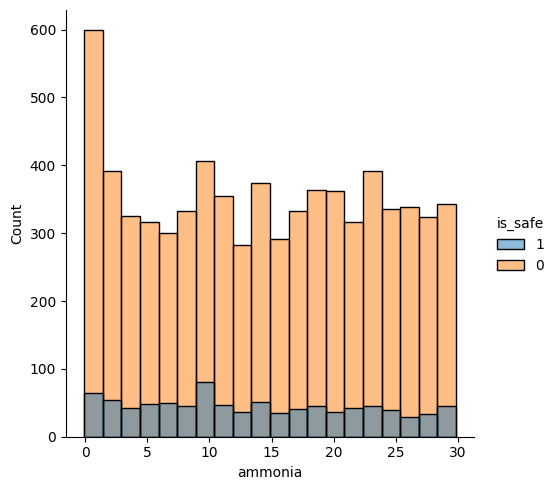

In [ ]:
sns.displot(data=data,x='ammonia',hue='is_safe',kind='hist')
plt.show()

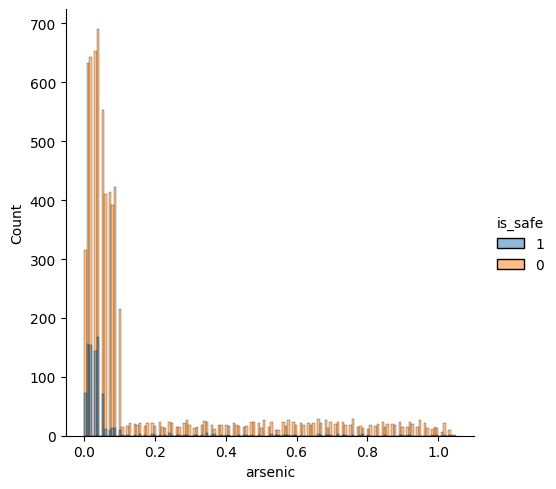

In [ ]:
sns.displot(data=data,x='arsenic',hue='is_safe',kind='hist')
plt.show()

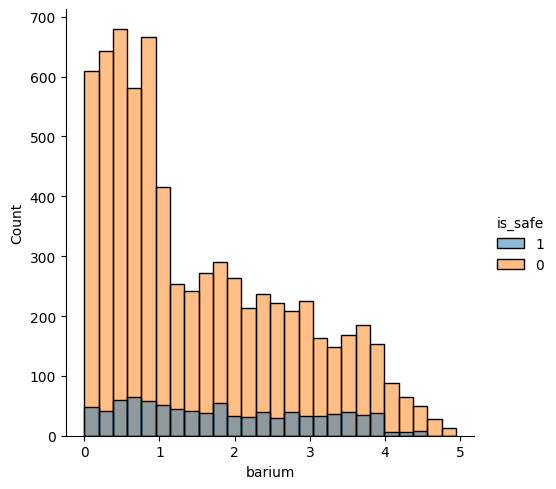

In [ ]:
sns.displot(data=data,x='barium',hue='is_safe',kind='hist')
plt.show()

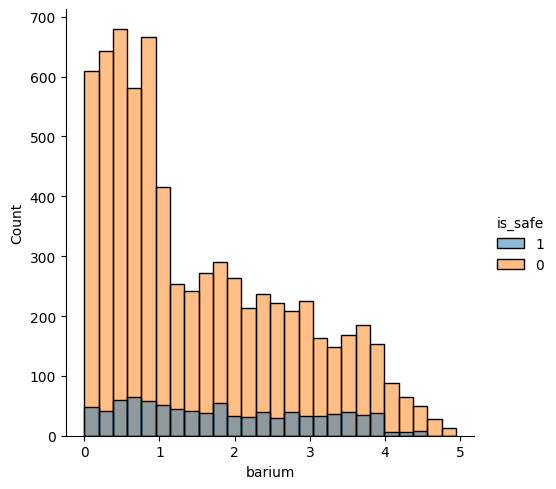

In [ ]:
sns.displot(data=data,x='barium',hue='is_safe',kind='hist')
plt.show()

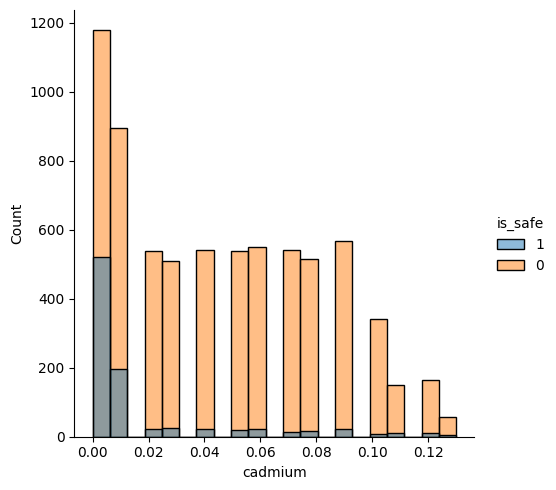

In [ ]:
sns.displot(data=data,x='cadmium',hue='is_safe',kind='hist')
plt.show()

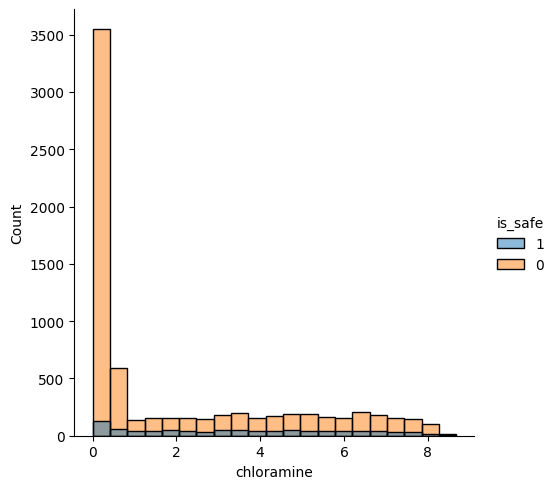

In [ ]:
sns.displot(data=data,x='chloramine',hue='is_safe',kind='hist')
plt.show()

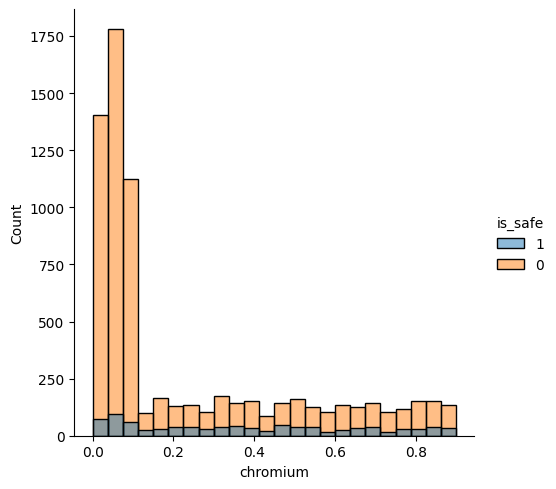

In [ ]:
sns.displot(data=data,x='chromium',hue='is_safe',kind='hist')
plt.show()

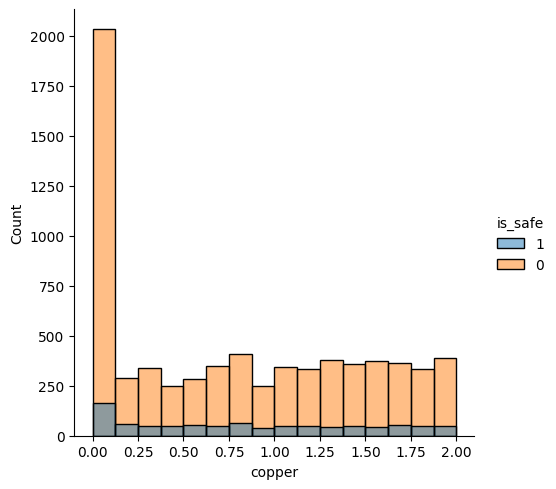

In [ ]:
sns.displot(data=data,x='copper',hue='is_safe',kind='hist')
plt.show()

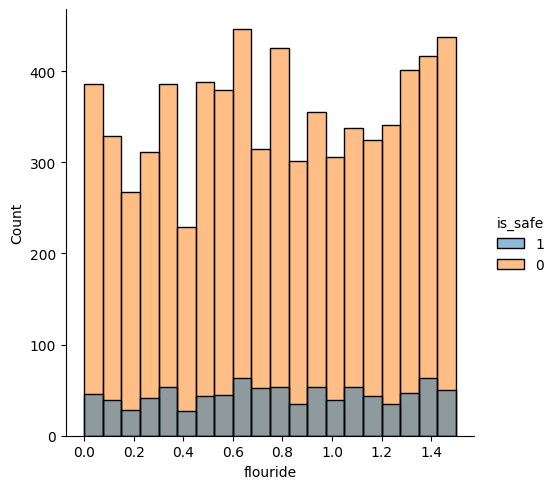

In [ ]:
sns.displot(data=data,x='flouride',hue='is_safe',kind='hist')
plt.show()

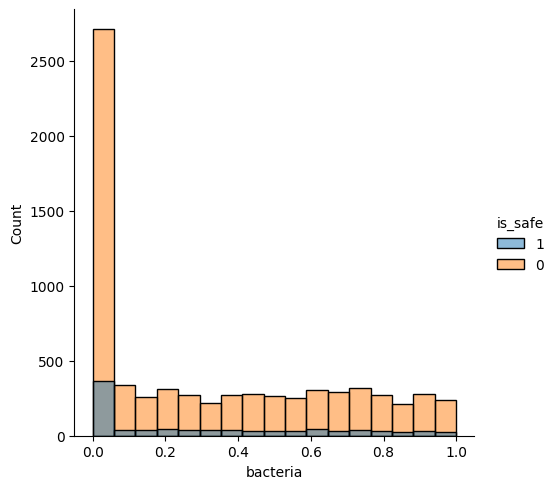

In [ ]:
sns.displot(data=data,x='bacteria',hue='is_safe',kind='hist')
plt.show()

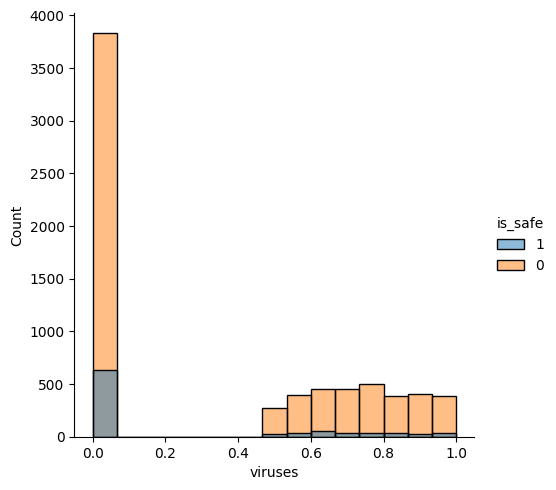

In [ ]:
sns.displot(data=data,x='viruses',hue='is_safe',kind='hist')
plt.show()

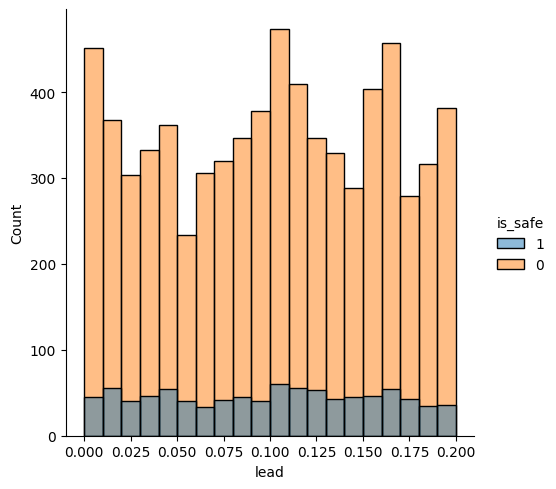

In [ ]:
sns.displot(data=data,x='lead',hue='is_safe',kind='hist')
plt.show()

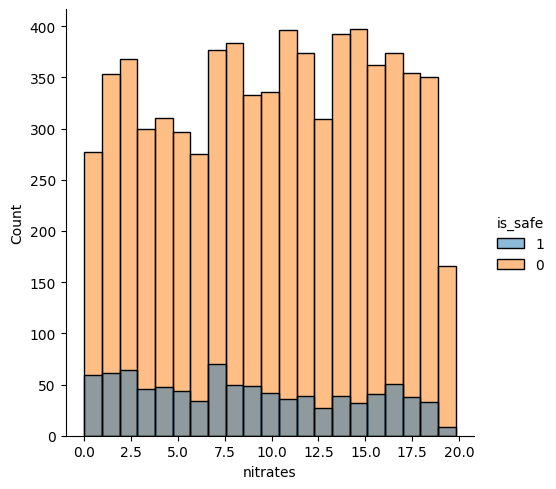

In [ ]:
sns.displot(data=data,x='nitrates',hue='is_safe',kind='hist')
plt.show()

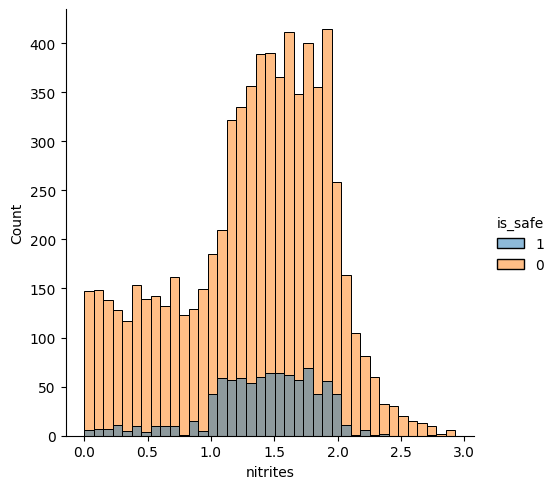

In [ ]:
sns.displot(data=data,x='nitrites',hue='is_safe',kind='hist')
plt.show()

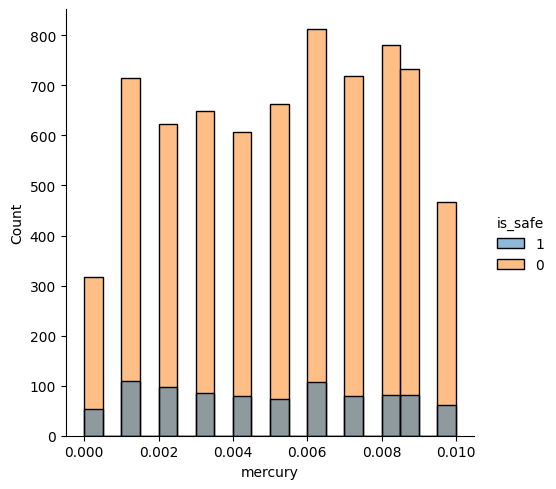

In [ ]:
sns.displot(data=data,x='mercury',hue='is_safe',kind='hist')
plt.show()

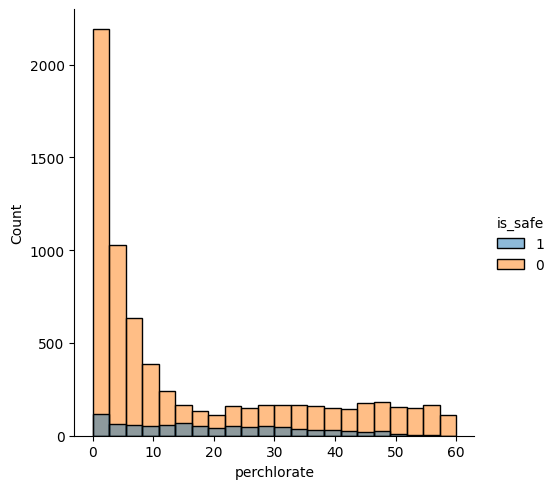

In [ ]:
sns.displot(data=data,x='perchlorate',hue='is_safe',kind='hist')
plt.show()

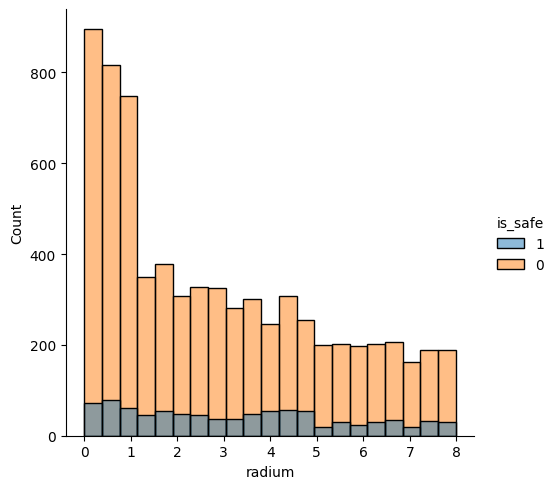

In [ ]:
sns.displot(data=data,x='radium',hue='is_safe',kind='hist')
plt.show()

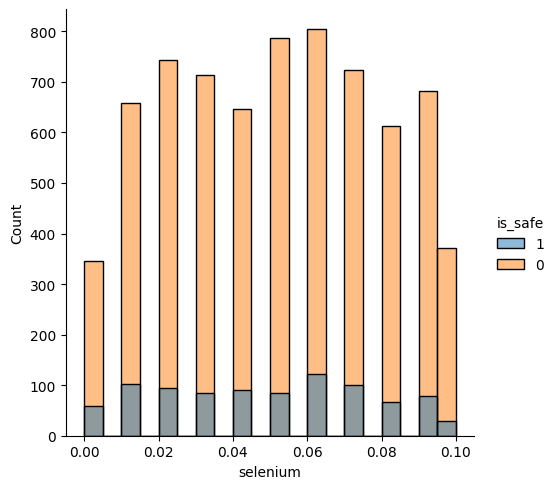

In [ ]:
sns.displot(data=data,x='selenium',hue='is_safe',kind='hist')
plt.show()

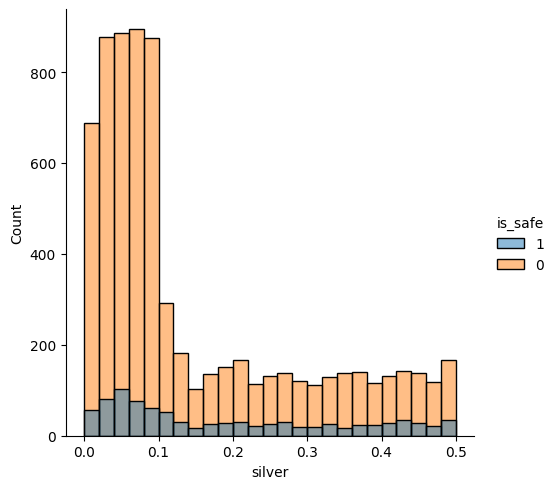

In [ ]:
sns.displot(data=data,x='silver',hue='is_safe',kind='hist')
plt.show()

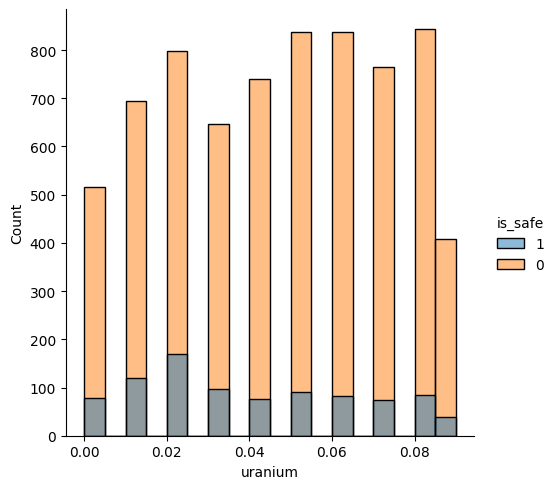

In [ ]:
sns.displot(data=data,x='uranium',hue='is_safe',kind='hist')
plt.show()

## Basic EDA

In [ ]:
data.isnull().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7996 entries, 0 to 7995
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float32
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

In [ ]:
data.describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
count,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000
mean,0.666396,14.278212,0.161477,1.567928,0.042803,2.177589,0.247300,0.805940,0.771646,0.319714,0.328706,0.099431,9.819250,1.329846,0.005193,16.465266,2.920106,0.049684,0.147811,0.044672
std,1.265323,8.878930,0.252632,1.216227,0.036049,2.567210,0.270663,0.653595,0.435423,0.329497,0.378113,0.058169,5.541977,0.573271,0.002967,17.688827,2.322805,0.028773,0.143569,0.026906
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.577500,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.407500,0.000000,0.002000,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,0.008000,0.102000,9.930000,1.420000,0.005000,7.745000,2.410000,0.050000,0.080000,0.050000
75%,0.280000,22.132499,0.100000,2.482500,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,0.700000,0.151000,14.610000,1.760000,0.008000,29.487500,4.670000,0.070000,0.240000,0.070000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000


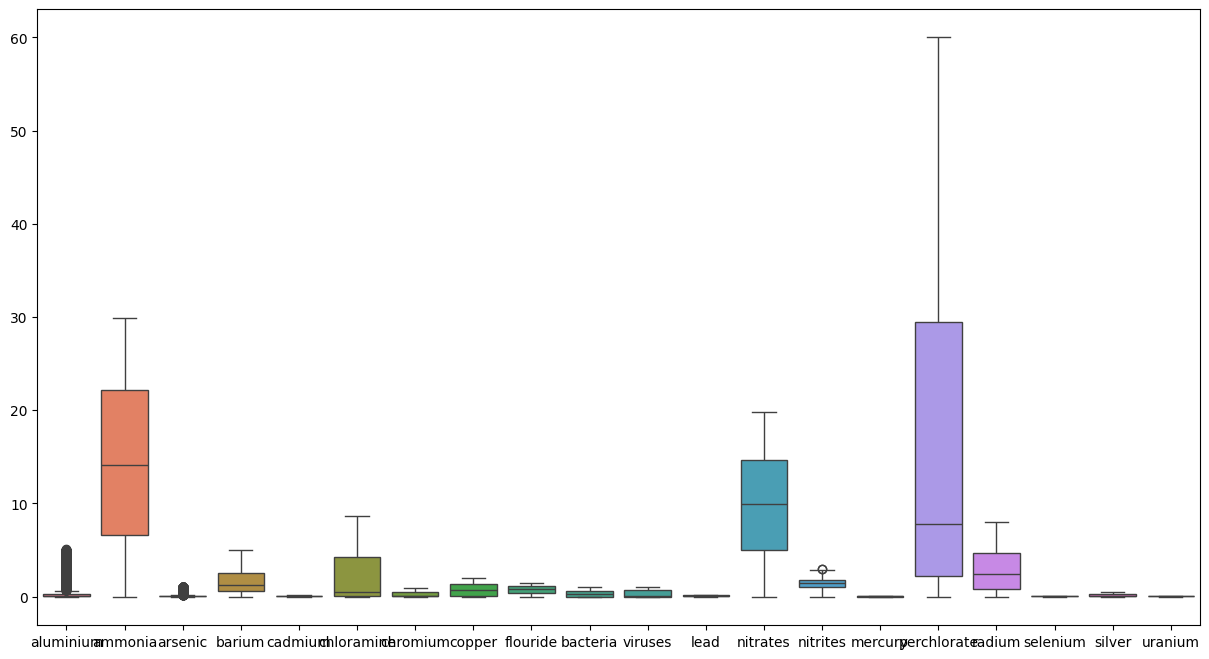

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(data=data,width=0.8)
plt.show()

## Features and Targets

In [ ]:
X=data.drop(['is_safe'],axis=1)
y=data['is_safe']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## SMOTE

In [ ]:
from imblearn. over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

## Logistic Regression

In [ ]:
lr=LogisticRegression()
lr.fit(X_train_resampled, y_train_resampled)

pred = lr.predict(X_test)

acc=accuracy_score(y_test,pred)
acc

0.80875

In [ ]:
confusion_matrix(y_test,pred)

array([[1151,  249],
       [  57,  143]])

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.82      0.88      1400
           1       0.36      0.71      0.48       200

    accuracy                           0.81      1600
   macro avg       0.66      0.77      0.68      1600
weighted avg       0.88      0.81      0.83      1600



## Decision Tree Classifier

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train_resampled, y_train_resampled)

pred = dt.predict(X_test)
acc=accuracy_score(y_test,pred)

acc

0.9325

In [ ]:
confusion_matrix(y_test,pred)

array([[1333,   67],
       [  41,  159]])

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1400
           1       0.70      0.80      0.75       200

    accuracy                           0.93      1600
   macro avg       0.84      0.87      0.85      1600
weighted avg       0.94      0.93      0.93      1600



# Random Forest Classifier

In [ ]:
rf=RandomForestClassifier()
rf.fit(X_train_resampled, y_train_resampled)

pred = rf.predict(X_test)

acc=accuracy_score(y_test,pred)

acc

0.94625

In [ ]:
confusion_matrix(y_test,pred)

array([[1360,   40],
       [  46,  154]])

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1400
           1       0.79      0.77      0.78       200

    accuracy                           0.95      1600
   macro avg       0.88      0.87      0.88      1600
weighted avg       0.95      0.95      0.95      1600



## SVC

In [ ]:
SVC=SVC()

SVC.fit(X_train_resampled, y_train_resampled)
pred = SVC.predict(X_test)

acc=accuracy_score(y_test,pred)
acc

0.7925

In [ ]:
confusion_matrix(y_test,pred)

array([[1114,  286],
       [  46,  154]])

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.80      0.87      1400
           1       0.35      0.77      0.48       200

    accuracy                           0.79      1600
   macro avg       0.66      0.78      0.68      1600
weighted avg       0.88      0.79      0.82      1600



## KNN

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=2)

knn_classifier.fit(X_train_resampled, y_train_resampled)
pred = knn_classifier.predict(X_test)

acc = accuracy_score(y_test, pred)
acc

0.803125

In [ ]:
confusion_matrix(y_test,pred)

array([[1220,  180],
       [ 135,   65]])

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89      1400
           1       0.27      0.33      0.29       200

    accuracy                           0.80      1600
   macro avg       0.58      0.60      0.59      1600
weighted avg       0.82      0.80      0.81      1600



## Gradient Boosting Classifier

In [ ]:
gb_classifier = GradientBoostingClassifier()

gb_classifier.fit(X_train_resampled, y_train_resampled)

pred = gb_classifier.predict(X_test)

acc = accuracy_score(y_test, pred)
acc

0.93625

In [ ]:
confusion_matrix(y_test,pred)

array([[1340,   60],
       [  42,  158]])

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1400
           1       0.72      0.79      0.76       200

    accuracy                           0.94      1600
   macro avg       0.85      0.87      0.86      1600
weighted avg       0.94      0.94      0.94      1600



In [ ]:
X_train_resampled_numeric = X_train_resampled.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values resulting from conversion
X_train_resampled_numeric = X_train_resampled_numeric.dropna()

In [ ]:
y_train_resampled_numeric = y_train_resampled.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values resulting from conversion
y_train_resampled_numeric = y_train_resampled_numeric.dropna()

In [ ]:
X_test_numeric = X_test.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values resulting from conversion
X_test_numeric = X_test_numeric.dropna()

In [ ]:
y_test_numeric = y_test.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values resulting from conversion X_test_numeric, y_test_numeric
y_test_numeric = y_test_numeric.dropna()

## FNN

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Creating a feedforward neural network model
model = Sequential()

# Adding input layer and hidden layer
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

# Adding output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(X_train_resampled_numeric, y_train_resampled_numeric, epochs=20, batch_size=32, verbose=1)

# Evaluating the model's performance
loss, accuracy = model.evaluate(X_test_numeric, y_test_numeric)
print("Loss:", loss)
print("Accuracy:", accuracy)

Epoch 1/20
356/356 [==============================] - 2s 2ms/step - loss: 0.5627 - accuracy: 0.7269
Epoch 2/20
356/356 [==============================] - 1s 2ms/step - loss: 0.4424 - accuracy: 0.8007
Epoch 3/20
356/356 [==============================] - 1s 2ms/step - loss: 0.4046 - accuracy: 0.8245
Epoch 4/20
356/356 [==============================] - 1s 2ms/step - loss: 0.3762 - accuracy: 0.8403
Epoch 5/20
356/356 [==============================] - 1s 2ms/step - loss: 0.3530 - accuracy: 0.8512
Epoch 6/20
356/356 [==============================] - 1s 2ms/step - loss: 0.3324 - accuracy: 0.8648
Epoch 7/20
356/356 [==============================] - 1s 2ms/step - loss: 0.3138 - accuracy: 0.8694
Epoch 8/20
356/356 [==============================] - 1s 2ms/step - loss: 0.2953 - accuracy: 0.8834
Epoch 9/20
356/356 [==============================] - 1s 2ms/step - loss: 0.2826 - accuracy: 0.8885
Epoch 10/20
356/356 [==============================] - 1s 3ms/step - loss: 0.2753 - accuracy: 0.8917

In [ ]:
y_pred_prob = model.predict(X_test_numeric)
y_pred = (y_pred_prob > 0.5).astype(int)

cm = confusion_matrix(y_test_numeric, y_pred)
cm

50/50 [==============================] - 0s 2ms/step


array([[1266,  134],
       [  42,  158]])

In [ ]:
print(classification_report(y_test_numeric, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.90      0.94      1400
           1       0.54      0.79      0.64       200

    accuracy                           0.89      1600
   macro avg       0.75      0.85      0.79      1600
weighted avg       0.91      0.89      0.90      1600



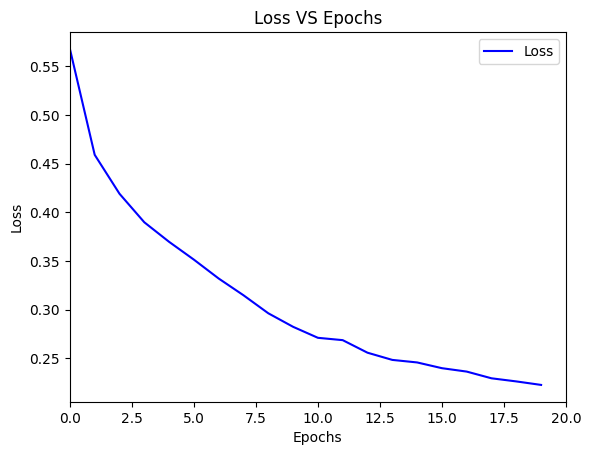

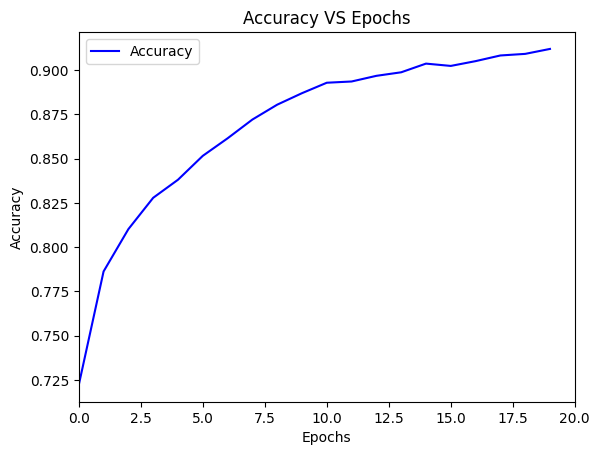

In [ ]:
model_loss = [0.5680,0.4592,0.4192,0.3899,0.3698,0.3515,0.3321,0.3149,0.2964,0.2825,0.2712,0.2688,0.2559,0.2485,0.2459,0.2400,
              0.2365,0.2296,0.2264,0.2228]
model_accuracy = [0.7222,0.7863,0.8102,0.8279,0.8381,0.8516,0.8615,0.8721,0.8805,0.8870,0.8929,0.8936,0.8968,0.8988,0.9037,0.9024,
                  0.9051,0.9083,0.9092,0.9120]

plt.plot(model_loss, 'b', label='Loss')
plt.xlim(0, 20)
plt.title('Loss VS Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting the accuracy
plt.plot(model_accuracy, 'b', label='Accuracy')
plt.xlim(0, 20)
plt.title('Accuracy VS Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Stacked Ensemble Classifier with 3 FNN

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming X_train_scaled, X_test_scaled, y_train, y_test are already defined

# Initialize a list to store individual FNN models
fnn_models = []

# Define different FNN models with different hyperparameters
fnn_model_1 = MLPClassifier(hidden_layer_sizes=(64,), activation='relu', solver='adam', random_state=42)
fnn_model_2 = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', solver='adam', random_state=42)
fnn_model_3 = MLPClassifier(hidden_layer_sizes=(256, 128, 64), activation='relu', solver='adam', random_state=42)

# Train individual FNN models
for model in [fnn_model_1, fnn_model_2, fnn_model_3]:
    model.fit(X_train_resampled, y_train_resampled)
    fnn_models.append(model)

# Create a meta-learner model (Random Forest classifier in this example)
meta_learner = RandomForestClassifier(random_state=42)

# Create a stacked ensemble classifier
stacked_ensemble = StackingClassifier(estimators=[('fnn_model_1', fnn_model_1),
                                                  ('fnn_model_2', fnn_model_2),
                                                  ('fnn_model_3', fnn_model_3)],
                                      final_estimator=meta_learner)

stacked_ensemble.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
ensemble_predictions = stacked_ensemble.predict(X_test)

# Calculate accuracy of the stacked ensemble classifier
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print("Ensemble Accuracy:", ensemble_accuracy)

Ensemble Accuracy: 0.9275


AUC Score: 0.9092374999999999


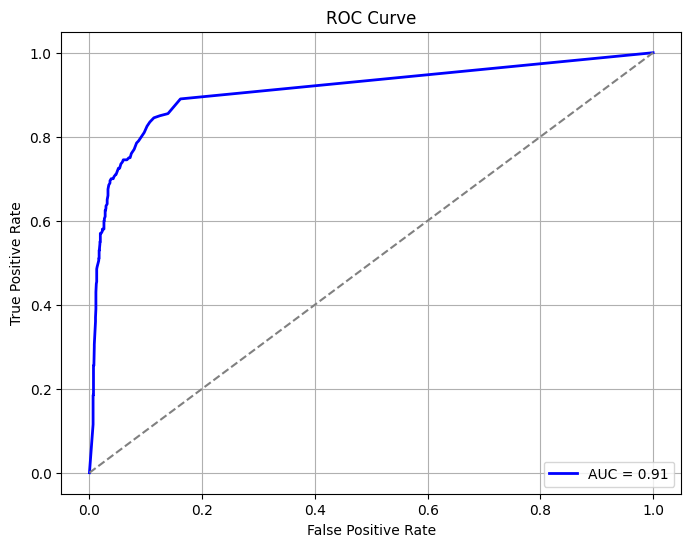

In [ ]:
# Convert string labels to numerical values
y_test_numerical = y_test.astype(int)

# Calculate predicted probabilities for the positive class
y_pred_prob = stacked_ensemble.predict_proba(X_test)[:, 1]

# Calculate AUC score
auc_score = roc_auc_score(y_test_numerical, y_pred_prob)
print("AUC Score:", auc_score)

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test_numerical, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [ ]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform 10-fold cross-validation
cv_scores = cross_val_score(stacked_ensemble, X_train_resampled, y_train_resampled, cv=k_fold)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Print the mean and standard deviation of the cross-validation scores
print("Mean CV score:", np.mean(cv_scores))
print("Standard deviation of CV scores:", np.std(cv_scores))

Cross-validation scores: [0.96833773 0.97361478 0.97009675 0.97361478 0.95690413 0.96657872
 0.97185576 0.97977133 0.97007042 0.96566901]
Mean CV score: 0.9696513403198435
Standard deviation of CV scores: 0.005732207842061447


In [ ]:
confusion_matrix(y_test,ensemble_predictions)

array([[1364,   36],
       [  80,  120]])

In [ ]:
print(classification_report(y_test,ensemble_predictions))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1400
           1       0.77      0.60      0.67       200

    accuracy                           0.93      1600
   macro avg       0.86      0.79      0.82      1600
weighted avg       0.92      0.93      0.92      1600



In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming X_train_resampled, X_test, y_train_resampled, y_test are already defined

# Initialize a list to store individual FNN models
fnn_models = []

# Define different FNN models with different hyperparameters
fnn_model_1 = MLPClassifier(hidden_layer_sizes=(64,), activation='relu', solver='adam', random_state=42)
fnn_model_2 = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', solver='adam', random_state=42)
fnn_model_3 = MLPClassifier(hidden_layer_sizes=(256, 128, 64), activation='relu', solver='adam', random_state=42)
fnn_model_4 = MLPClassifier(hidden_layer_sizes=(32, 16), activation='relu', solver='adam', random_state=42)
fnn_model_5 = MLPClassifier(hidden_layer_sizes=(128,), activation='relu', solver='adam', random_state=42)
fnn_model_6 = MLPClassifier(hidden_layer_sizes=(64, 32, 16), activation='relu', solver='adam', random_state=42)

# Train individual FNN models
for model in [fnn_model_1, fnn_model_2, fnn_model_3, fnn_model_4, fnn_model_5, fnn_model_6]:
    model.fit(X_train_resampled, y_train_resampled)
    fnn_models.append(model)

# Create a meta-learner model (Random Forest classifier in this example)
meta_learner = RandomForestClassifier(random_state=42)

# Create a stacked ensemble classifier
stacked_ensemble = StackingClassifier(estimators=[('fnn_model_1', fnn_model_1),
                                                  ('fnn_model_2', fnn_model_2),
                                                  ('fnn_model_3', fnn_model_3),
                                                  ('fnn_model_4', fnn_model_4),
                                                  ('fnn_model_5', fnn_model_5),
                                                  ('fnn_model_6', fnn_model_6)],
                                      final_estimator=meta_learner)

stacked_ensemble.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
ensemble_predictions = stacked_ensemble.predict(X_test)

# Calculate accuracy of the stacked ensemble classifier
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print("Ensemble Accuracy:", ensemble_accuracy)


Ensemble Accuracy: 0.924375


## Comparison of results

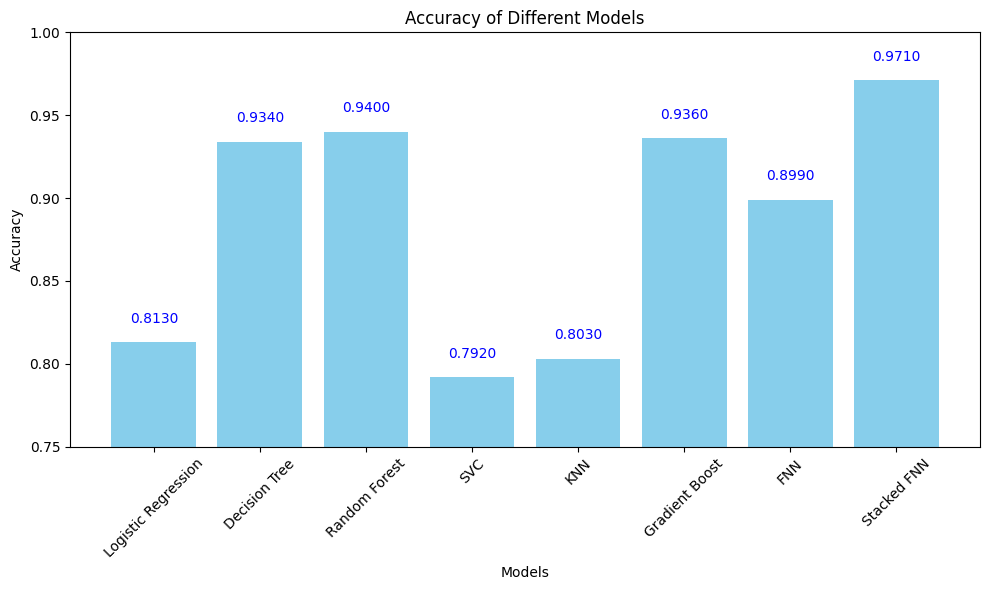

In [ ]:
import matplotlib.pyplot as plt

# Data
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVC', 'KNN', 'Gradient Boost', 'FNN', 'Stacked FNN']
accuracy = [0.813, 0.934, 0.94, 0.792, 0.803, 0.936, 0.899, 0.9710]

# Create bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracy, color='skyblue')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0.75, 1)  # Set y-axis limit to show full range of accuracy values

# Add accuracy labels above each bar
for bar, acc in zip(bars, accuracy):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{acc:.4f}', ha='center', va='bottom', color='Blue')

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
